In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style(
    style='darkgrid', 
    rc={'axes.facecolor': '.9', 'grid.color': '.8'}
)
sns.set_palette(palette='deep')
plt.rcParams['figure.figsize'] = [10, 6]
plt.rcParams['figure.dpi'] = 100

c:\Users\shiho\anaconda\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [11]:
df = pd.read_csv('datasets/american_bankruptcy.csv')

import pandas as pd

df.head()

,company_name,status_label,year,X1,X2,X3,X4,X5,X6,X7,...,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18
0,C_1,alive,1999,511.267,833.107,18.373,89.031,336.018,35.163,128.348,...,1024.333,740.998,180.447,70.658,191.226,163.816,201.026,1024.333,401.483,935.302
1,C_1,alive,2000,485.856,713.811,18.577,64.367,320.590,18.531,115.187,...,874.255,701.854,179.987,45.790,160.444,125.392,204.065,874.255,361.642,809.888
2,C_1,alive,2001,436.656,526.477,22.496,27.207,286.588,-58.939,77.528,...,638.721,710.199,217.699,4.711,112.244,150.464,139.603,638.721,399.964,611.514
3,C_1,alive,2002,396.412,496.747,27.172,30.745,259.954,-12.410,66.322,...,606.337,686.621,164.658,3.573,109.590,203.575,124.106,606.337,391.633,575.592
4,C_1,alive,2003,432.204,523.302,26.680,47.491,247.245,3.504,104.661,...,651.958,709.292,248.666,20.811,128.656,131.261,131.884,651.958,407.608,604.467


In [13]:
df.year.min()
df.year.max()

2018

In [14]:
# Assuming your DataFrame is named df
df['transformed_status'] = df['status_label'].apply(lambda x: 0 if x == 'alive' else 1)
df['transformed_year'] = df['year'].apply(lambda x: x - 1999)


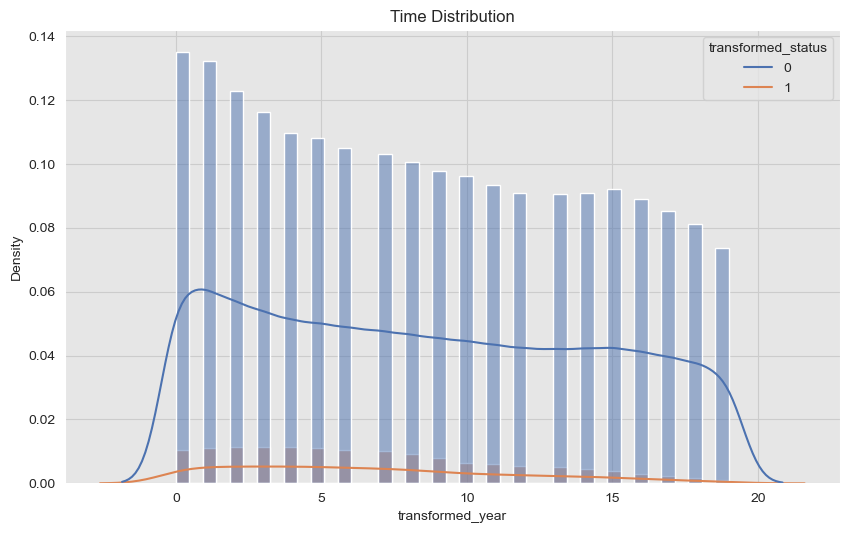

In [16]:
fig, ax = plt.subplots()
sns.histplot(x='transformed_year', data=df, hue='transformed_status', stat='density', ax=ax)
sns.kdeplot(x='transformed_year', data=df, hue='transformed_status', fill=False, ax=ax)
ax.set(title='Time Distribution');

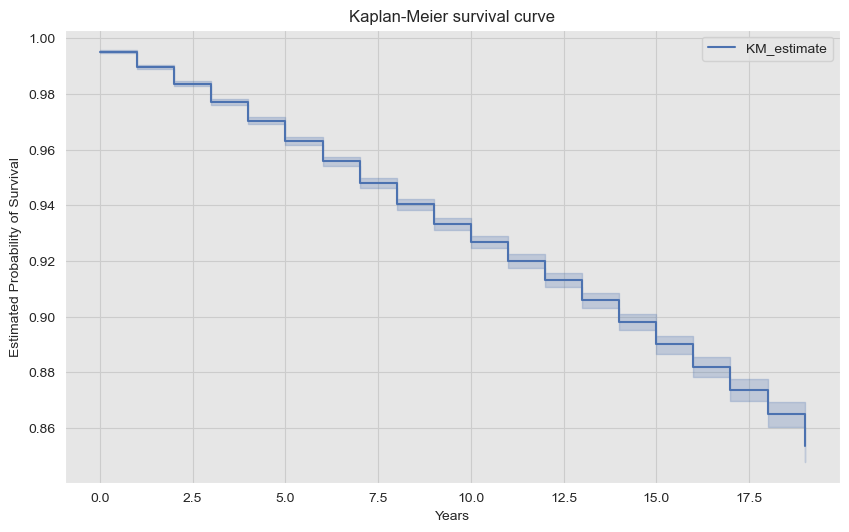

In [18]:
from lifelines import KaplanMeierFitter

kmf = KaplanMeierFitter()

kmf.fit(durations=df['transformed_year'], event_observed=df['transformed_status'])

fig, ax =  plt.subplots()
kmf.plot_survival_function(color='C0',ax=ax)
ax.set(
    title='Kaplan-Meier survival curve',
    xlabel='Years',
    ylabel='Estimated Probability of Survival'
);

In [ ]:
from lifelines import CoxPHFitter

cph = CoxPHFitter()

cph.fit(df=bc_df, duration_col='transformed_year', event_col='transformed_status', formula='sex')

cph.print_summary()